# Model Testing
After training 5 machine learning models (logistic regression, decision tree, random forest, LightGBM & a neural<br/>
network), the purpose of this notebook is to test the performance of each using the previously unused test data.<br/>
This will let us determine which model is the most accurate in detecting Acute Kidney Failure in unseen patients.<br/>
The metric for scoring the models will remain AUC.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
# Set up paths & import src functions
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
src_folder = os.path.join(project_root, 'src')
sys.path.insert(0, src_folder)
from modeling import *
from s3_storage import *

In [3]:
# Import data
X_train = from_s3(bucket='mimic-jamesi',
                  filepath='data/acute_kidney_failure_X_train.npy')
X_test = from_s3(bucket='mimic-jamesi',
                 filepath='data/acute_kidney_failure_X_test.npy')
y_train = from_s3(bucket='mimic-jamesi',
                  filepath='data/acute_kidney_failure_y_train.npy')
y_test = from_s3(bucket='mimic-jamesi',
                 filepath='data/acute_kidney_failure_y_test.npy')

In [4]:
def run_final_test(model, X_test, y_test):
    '''
    Function that imports a trained model from AWS S3, and runs it on the
    test data. The output is the AUC score on the test data.
    '''
    m = from_s3(bucket='mimic-jamesi', filepath='models/{}'.format(model))
    predict = m.predict_proba(X_test)
    score = roc_auc_score(y_test, predict[:,-1])
    print("{} score: ".format(model), score)
    return score

In [5]:
# Import the trained models and run on the test data
logistic_score = run_final_test('logistic_regression', X_test, y_test)
dt_score = run_final_test('decision_tree', X_test, y_test)
rf_score = run_final_test('random_forest', X_test, y_test)
lightgbm_score = run_final_test('light_gbm', X_test, y_test)
nn_score = run_final_test('neural_network', X_test, y_test)

logistic_regression score:  0.8473821401576503
decision_tree score:  0.8554605334197172
random_forest score:  0.8801820537738905
light_gbm score:  0.867031854011446


Using TensorFlow backend.


neural_network score:  0.8736095454054636


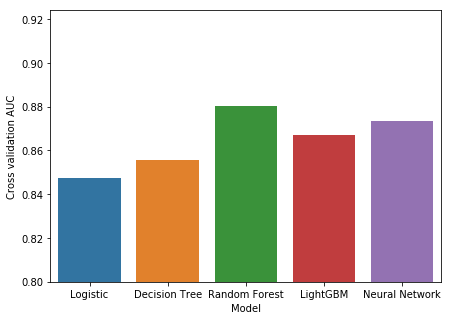

In [12]:
# Visualise the final AUC scores
names = ['Logistic', 'Decision Tree', 'Random Forest',
         'LightGBM', 'Neural Network']
scores = [logistic_score, dt_score, rf_score, lightgbm_score, nn_score]

plt.figure(figsize = (7, 5))
sns.barplot(names, scores)
plt.ylim(0.8)
plt.xlabel('Model')
plt.ylabel('Cross validation AUC')
plt.show()

## Conclusion